In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/home/user/DanSpeech-AdvancedMachineLearning/AML Cleaned'

# Ablation Search on clean dataset

## Forward feature selection

In [3]:
path = os.path.join(os.getcwd(),"Scores")

df_final = pd.read_csv(os.path.join(path,"FinaleModels.csv"),sep=";")

df_base = pd.read_csv(os.path.join(path,"Baseline_Test_scores.csv"),sep=";")


In [4]:
df_final.sample(2)

,Data_type,Decoder_type,LM_type,model_ID,Reference,WER,CER,Transcript
434,Tue_test_split,beam,dsl_5gram.klm,Noisy_original_hyper-parameters_both_augs.pth,jeg kan med sindsro sige at jeg er overbevist ...,0.133333,0.038961,der kan med sindsro sige at jeg er overbevist ...
972,Tue_test_split,greedy,None,Noisy_original_hyper-parameters_only_spec_augm...,forsvaret vil ifølge regeringen også i årene f...,0.062500,0.029703,forsvaret vil ifølge regeringen også i årene f...


In [5]:
df_base.sample(2)

,Data_type,Decoder_type,LM_type,model_ID,Reference,WER,CER,Transcript
97,Tue_test_split,beam,dsl_5gram.klm,DanSpeechPrimary.pth,det er selvfølgelig ærgerligt at spændingen he...,0.090909,0.036496,det er selvfølgelig ærgerligt at spændingen ha...
1451,Tue_Noise_test_split,greedy,None,noisy_all_augs.pth,før den tid havde kunstsamlingerne andre funkt...,0.714286,0.196078,dører de til have kunstsamlingerne andre pensi...


In [6]:
#substitute LM_type with Data_type when new transcript is ready

df_finalmeans = df_final.groupby(['Decoder_type','LM_type','model_ID','Data_type']).mean()[["WER","CER"]].unstack()
df_finalmeans = df_finalmeans["WER"].loc["greedy"].loc["None"]

df_basemeans = df_base.groupby(['Decoder_type','LM_type','model_ID','Data_type']).mean()[["WER","CER"]].unstack()
df_basemeans = df_basemeans["WER"].loc["greedy"].loc["None"]

df_finalmeans = round(df_finalmeans[["Tue_test_split","Tue_Noise_test_split"]]*100,2)
df_basemeans = round(df_basemeans[["Tue_test_split","Tue_Noise_test_split"]]*100,2)


In [7]:
df_finalmeans

Data_type,Tue_test_split,Tue_Noise_test_split
model_ID,,
Clean_original_hyper-parameters.pth,24.79,53.47
Noisy_original_hyper-parameters_both_augs.pth,26.88,49.14
Noisy_original_hyper-parameters_only_room_reverb.pth,23.68,46.56
Noisy_original_hyper-parameters_only_spec_augment.pth,26.09,50.52


In [8]:
df_basemeans.loc[["clean_all_augs.pth","noisy_all_augs.pth"]]

Data_type,Tue_test_split,Tue_Noise_test_split
model_ID,,
clean_all_augs.pth,26.70,56.80
noisy_all_augs.pth,32.35,55.32


# Confidence intervals for greedy on clean and noisy

In [9]:
df_CI_final = df_final[df_final.Decoder_type == "greedy"]

df_CI_clean_final = df_CI_final[df_CI_final.Data_type == "Tue_test_split"]

df_CI_noisy_final = df_CI_final[df_CI_final.Data_type == "Tue_Noise_test_split"]

In [10]:
df_CI_base = df_base[df_base.Decoder_type == "greedy"]

df_CI_clean_base = df_CI_base[df_CI_base.Data_type == "Tue_test_split"]

df_CI_noisy_base = df_CI_base[df_CI_base.Data_type == "Tue_Noise_test_split"]

## Paired CI for clean data

In [11]:
#Reference WER dataframe for final models
models = df_final.model_ID.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = df_CI_clean_final[df_CI_clean_final.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})
        temp = temp.set_index("Reference")
        
        clean_ref_df_final = temp.copy()
        
    else:
        temp = df_CI_clean_final[df_CI_clean_final.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'}) 
        temp = temp.set_index("Reference")
        
        clean_ref_df_final = clean_ref_df_final.join(temp,on=["Reference"])

In [12]:
#Reference WER dataframe for baseline scores
models = df_base.model_ID.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = df_CI_clean_base[df_CI_clean_base.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})
        temp = temp.set_index("Reference")
        
        clean_ref_df_base = temp.copy()
        
    else:
        temp = df_CI_clean_base[df_CI_clean_base.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'}) 
        temp = temp.set_index("Reference")
        
        clean_ref_df_base = clean_ref_df_base.join(temp,on=["Reference"])

In [28]:
joined_df = clean_ref_df_final.join(clean_ref_df_base,on="Reference")


clean_dif_df = (joined_df.T - joined_df["clean_all_augs.pth"]).T

clean_dif_df.sample(5)

,Clean_original_hyper-parameters.pth,Noisy_original_hyper-parameters_both_augs.pth,Noisy_original_hyper-parameters_only_room_reverb.pth,Noisy_original_hyper-parameters_only_spec_augment.pth,DanSpeechPrimary.pth,clean_no_augs.pth,clean_all_augs.pth,noisy_no_augs.pth,noisy_all_augs.pth
Reference,,,,,,,,,
videre skal politiet have yderligere beføjelser til at gennemgå hotelgæstebøger samt telefonselskaber og kreditkortfirmaers arkiver,-0.133333,-0.133333,-0.133333,-0.066667,0.066667,0.0,0.0,0.000000,-0.066667
hertil kommer et mindre antal institutioner og erhvervsvirksomheder,0.000000,0.250000,0.250000,0.000000,0.125000,0.0,0.0,0.250000,0.375000
det er uretfærdigt at sådanne kåringer bliver foretaget af folk der rejser i embeds medfør,-0.066667,0.133333,-0.066667,0.066667,0.066667,0.0,0.0,-0.066667,-0.066667
så meget for det upolitiske,-0.200000,-0.600000,-0.600000,-0.200000,-0.600000,-0.6,0.0,-0.600000,0.200000
en syv seks en seksten fire hundrede og tre,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


(array([ 2.,  8., 11., 17.,  6.,  1.,  0.,  0.,  1.,  2.]),
 array([-0.3125    , -0.22410714, -0.13571429, -0.04732143,  0.04107143,
         0.12946429,  0.21785714,  0.30625   ,  0.39464286,  0.48303571,
         0.57142857]),
 <a list of 10 Patch objects>)

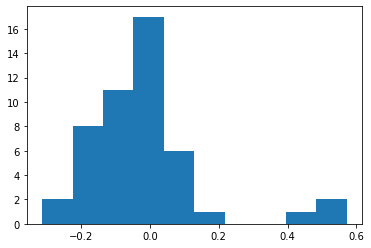

In [31]:
import matplotlib.pyplot as plt

plt.hist(clean_dif_df["Clean_original_hyper-parameters.pth"])

# Paired confidence with DanSpeech aug policy interval with alpha = 0.05

In [32]:
m_clean = clean_dif_df.mean()
s_clean = clean_dif_df.std()
n_clean = len(clean_dif_df)

In [16]:
s_clean

0.1672505153835653

In [36]:
models = ["Clean_original_hyper-parameters.pth",
          "Noisy_original_hyper-parameters_both_augs.pth",
          "Noisy_original_hyper-parameters_only_room_reverb.pth",
          "Noisy_original_hyper-parameters_only_spec_augment.pth"]

from scipy.stats import  t
confidence=0.05

h = t.ppf(1-(confidence/2), n_clean - 1) * (s_clean/(np.sqrt(n_clean)))

start = m_clean - h
end = m_clean + h

start *= 100
end *= 100

CIs_forwards = list(zip(models,start,end))

[print(f'{a}: ({b}) - ({c})') for a,b,c in CIs_forwards]

Clean_original_hyper-parameters.pth: (-6.760324837266676) - (2.9525726056014014)
Noisy_original_hyper-parameters_both_augs.pth: (-4.774512005988359) - (5.149572985668904)
Noisy_original_hyper-parameters_only_room_reverb.pth: (-7.979522270706211) - (1.952008369551006)
Noisy_original_hyper-parameters_only_spec_augment.pth: (-4.6408339038066755) - (3.421208873040342)


[None, None, None, None]

## Paired CI for noisy data

In [18]:
#Reference WER dataframe for final models
models = df_final.model_ID.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = df_CI_noisy_final[df_CI_noisy_final.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})
        temp = temp.set_index("Reference")
        
        noisy_ref_df_final = temp.copy()
        
    else:
        temp = df_CI_noisy_final[df_CI_noisy_final.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'}) 
        temp = temp.set_index("Reference")
        
        noisy_ref_df_final = noisy_ref_df_final.join(temp,on=["Reference"])

In [19]:
#Reference WER dataframe for baseline scores
models = df_base.model_ID.unique()

for i,m in enumerate(models):
    if i == 0:
        temp = df_CI_noisy_base[df_CI_noisy_base.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'})
        temp = temp.set_index("Reference")
        
        noisy_ref_df_base = temp.copy()
        
    else:
        temp = df_CI_noisy_base[df_CI_noisy_base.model_ID.isin([m])][["Reference","WER"]]
        temp = temp.rename(columns={"WER":f'{m}'}) 
        temp = temp.set_index("Reference")
        
        noisy_ref_df_base = noisy_ref_df_base.join(temp,on=["Reference"])

In [37]:
joined_df = noisy_ref_df_final.join(noisy_ref_df_base,on="Reference")


noisy_dif_df = joined_df.subtract(
                        joined_df["noisy_all_augs.pth"],0)
noisy_dif_df.sample(5)

,Clean_original_hyper-parameters.pth,Noisy_original_hyper-parameters_both_augs.pth,Noisy_original_hyper-parameters_only_room_reverb.pth,Noisy_original_hyper-parameters_only_spec_augment.pth,DanSpeechPrimary.pth,clean_no_augs.pth,clean_all_augs.pth,noisy_no_augs.pth,noisy_all_augs.pth
Reference,,,,,,,,,
den nye lov gjorde det nemmere at gennemskue hvad de har krav på,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
i den anden helikopter befandt sig to sårede journalister,0.000000,0.000000,0.111111,0.222222,0.000000,0.000000,0.111111,0.222222,0.0
undersøgelsen viser at børnene lytter mest til deres forældre når de skal finde ud af hvad de skal efter folkeskolen,0.050000,0.000000,-0.100000,0.100000,0.200000,0.150000,0.100000,0.050000,0.0
der er stadig et godt stykke vej at gå,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.111111,0.111111,0.0
kriminaliteten er da også dalet med over halvtreds procent de sidste fem år,0.615385,0.307692,0.153846,0.153846,0.692308,0.538462,0.307692,0.076923,0.0


(array([ 1.,  0.,  0.,  3.,  5., 14., 11., 17.,  7.,  1.]),
 array([-0.8       , -0.68666667, -0.57333333, -0.46      , -0.34666667,
        -0.23333333, -0.12      , -0.00666667,  0.10666667,  0.22      ,
         0.33333333]),
 <a list of 10 Patch objects>)

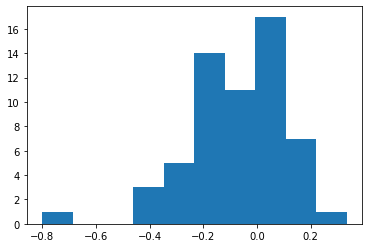

In [38]:
import matplotlib.pyplot as plt

plt.hist(noisy_dif_df["Noisy_original_hyper-parameters_only_room_reverb.pth"])

In [39]:
m_noisy = noisy_dif_df.mean()
s_noisy = noisy_dif_df.std()
n_noisy = len(noisy_dif_df)

In [40]:
s_noisy

Clean_original_hyper-parameters.pth                      0.191435
Noisy_original_hyper-parameters_both_augs.pth            0.175391
Noisy_original_hyper-parameters_only_room_reverb.pth     0.184631
Noisy_original_hyper-parameters_only_spec_augment.pth    0.153162
DanSpeechPrimary.pth                                     0.226431
clean_no_augs.pth                                        0.206242
clean_all_augs.pth                                       0.217051
noisy_no_augs.pth                                        0.194823
noisy_all_augs.pth                                       0.000000
dtype: float64

In [41]:
models = ["Clean_original_hyper-parameters.pth",
          "Noisy_original_hyper-parameters_both_augs.pth",
          "Noisy_original_hyper-parameters_only_room_reverb.pth",
          "Noisy_original_hyper-parameters_only_spec_augment.pth"]

from scipy.stats import  t
confidence=0.05

h = t.ppf(1-(confidence/2), n_noisy - 1) * (s_noisy/(np.sqrt(n_noisy)))

start = m_noisy - h
end = m_noisy + h

start *= 100
end *= 100

CIs_forwards = list(zip(models,start,end))

[print(f'{a}: ({b}) - ({c})') for a,b,c in CIs_forwards]

Clean_original_hyper-parameters.pth: (-6.838740986498548) - (3.1389132056483873)
Noisy_original_hyper-parameters_both_augs.pth: (-10.748899823986413) - (-1.6074966808606241)
Noisy_original_hyper-parameters_only_room_reverb.pth: (-13.575069895699048) - (-3.952035863866083)
Noisy_original_hyper-parameters_only_spec_augment.pth: (-8.792639352590397) - (-0.8097907236790276)


[None, None, None, None]